In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns

diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv")

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='date', ylabel='LodgingRevenue'>

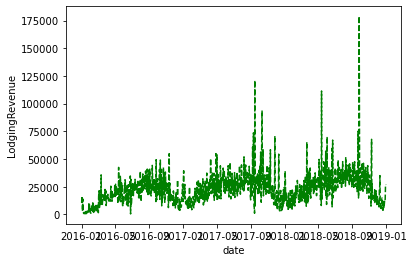

In [10]:
sns.lineplot(
    x="date",
    y="LodgingRevenue",
    data=hotels,
    estimator=sum,
    ci=None,
    ls='--',
    color='green'
)

## Seaborn Barplots

<AxesSubplot:xlabel='cut', ylabel='carat'>

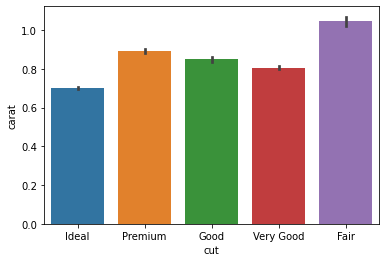

In [3]:
sns.barplot(
    x="cut",
    y="carat",
    data=diamonds,
)

<AxesSubplot:xlabel='carat', ylabel='cut'>

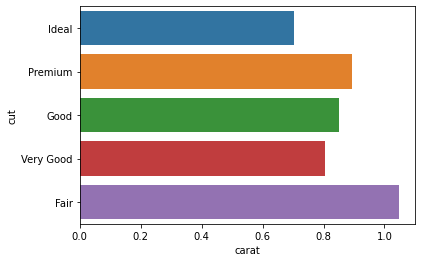

In [4]:
# Specify the numeric series as x to create a horizontal bar chart

sns.barplot(
    x="carat",
    y="cut",
    data=diamonds,
    ci=None
)

<AxesSubplot:xlabel='carat', ylabel='cut'>

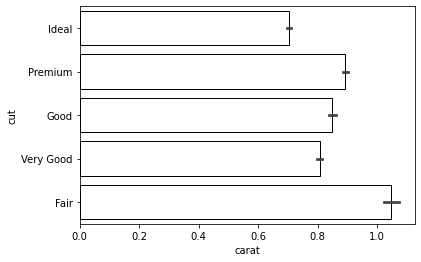

In [5]:
# Matplotlib formatting options generally apply to seaborn counterparts

sns.barplot(
    x="carat",
    y="cut",
    data=diamonds,
    facecolor="white",
    edgecolor="black"
)

<AxesSubplot:xlabel='carat', ylabel='cut'>

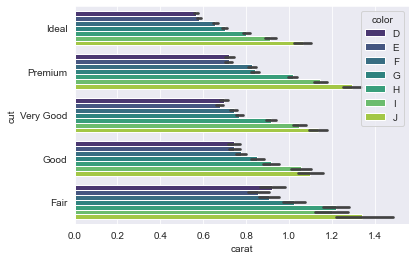

In [12]:
# Specify a categorical column in 'hue' to created grouped barplots

sns.barplot(
    x="carat",
    y="cut",
    hue="color",
    data=diamonds.sort_values(by="color"),
    palette='viridis'
)

## Histograms

<AxesSubplot:xlabel='price', ylabel='Percent'>

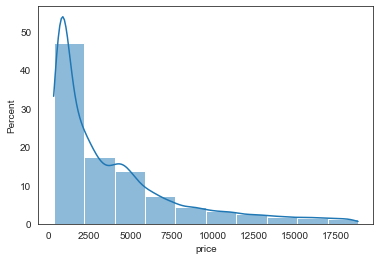

In [41]:
sns.histplot(
    x="price", 
    bins=10, 
    kde=True, 
    stat='percent',
    data=diamonds
)

## Box and Violinplots

<AxesSubplot:xlabel='price'>

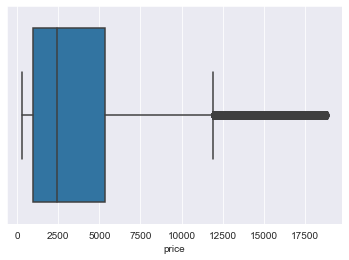

In [14]:
sns.boxplot(x="price", data=diamonds)

<AxesSubplot:xlabel='cut', ylabel='price'>

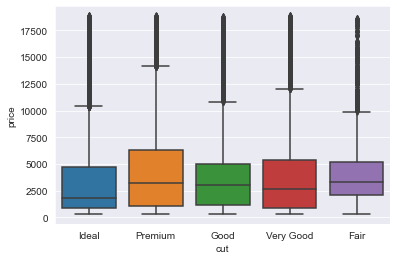

In [15]:
sns.boxplot(x="cut", y="price", data=diamonds)

<AxesSubplot:xlabel='price'>

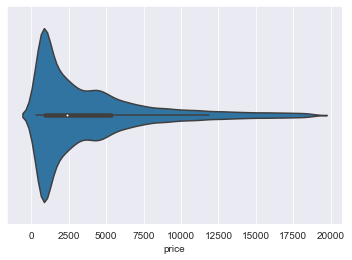

In [16]:
sns.violinplot(x="price", data=diamonds)

<AxesSubplot:xlabel='cut', ylabel='price'>

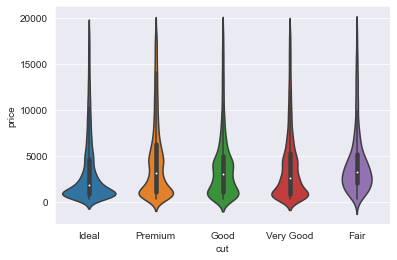

In [17]:
sns.violinplot(x="cut", y="price", data=diamonds)

# LMPLOT & REGPLOT

<AxesSubplot:xlabel='carat', ylabel='price'>

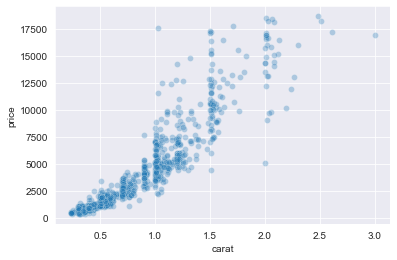

In [18]:
sns.scatterplot(
    x="carat", 
    y="price",
    alpha=.3,
    data=diamonds.sample(1000)
)

<AxesSubplot:xlabel='carat', ylabel='price'>

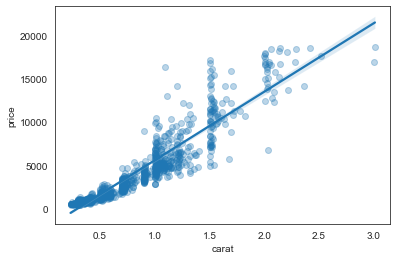

In [43]:
sns.regplot(
    x="carat", 
    y="price",
    scatter_kws={'alpha': .3},
    data=diamonds.sample(1000)
)

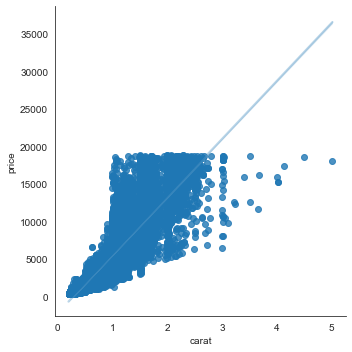

In [44]:
sns.lmplot(
    x="carat", 
    y="price", 
    # hue="clarity",
    line_kws={'alpha': .3},
    # fit_reg=False,
    data=diamonds
)

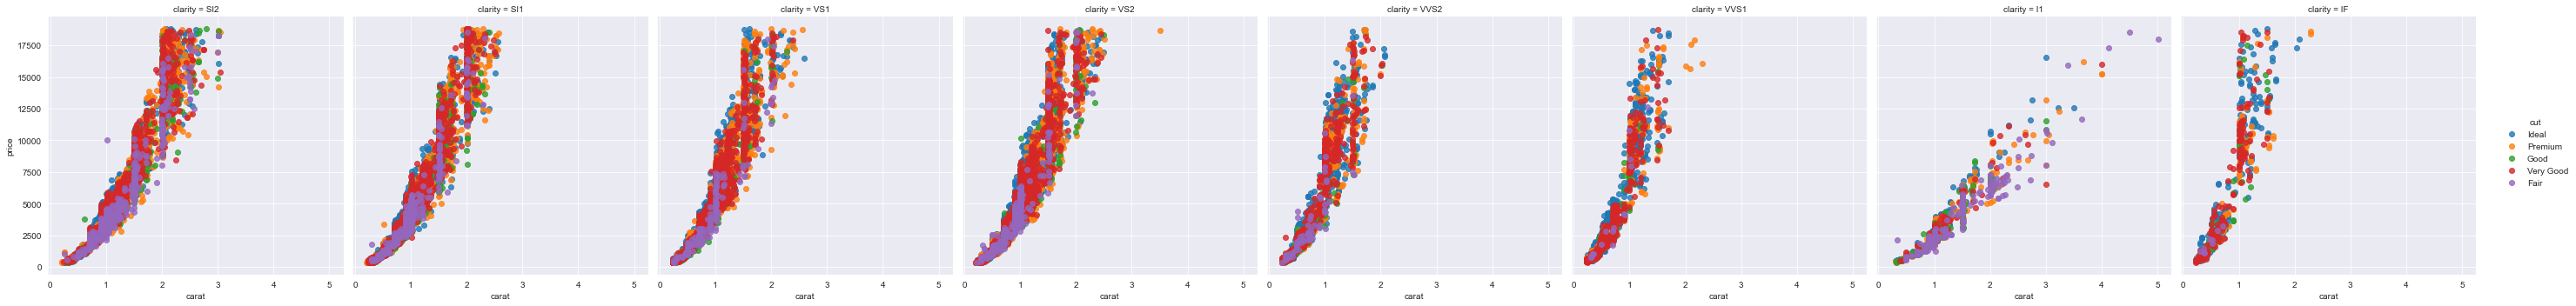

In [24]:
sns.lmplot(
    x="carat", 
    y="price", 
    # row="cut",
    col="clarity",
    fit_reg=False,
    # scatter=False,
    hue="cut",
    # by="cut",
    # alpha=.3
    data=diamonds
)

## Jointplot

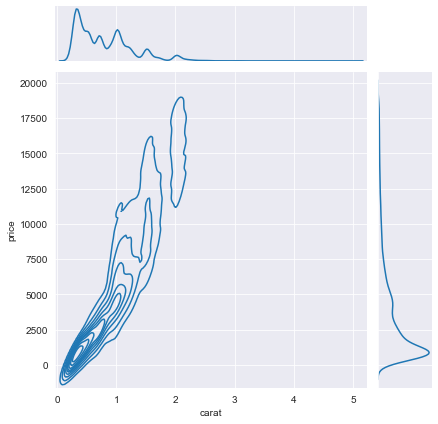

In [19]:
sns.jointplot(
    x="carat", 
    y="price", 
    kind='kde',
    data=diamonds
)

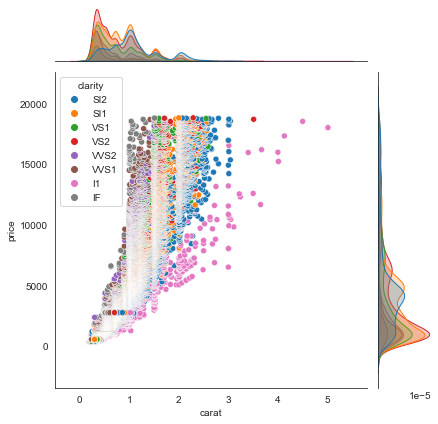

In [50]:
sns.jointplot(x="carat", y="price", hue="clarity", data=diamonds)

## Pairplot

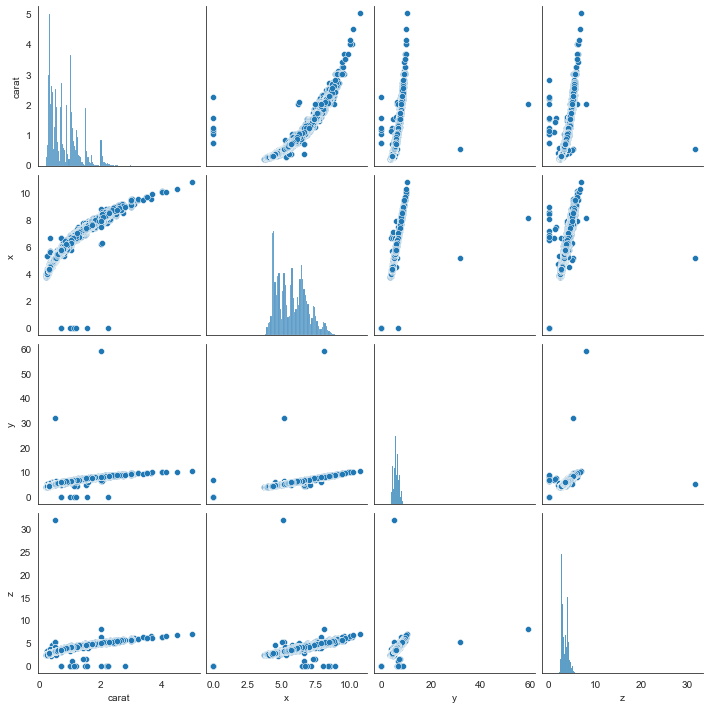

In [46]:
sns.pairplot(diamonds.loc[:, ["carat", "x", "y", "z"]])

## Heatmaps

In [28]:
diamonds_pivot = (
    diamonds.pivot_table(
        index="clarity",
        columns="color",
        values={"price":"mean"}
        )
).droplevel(0, axis=1)

diamonds_pivot.head()

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,3863.023810,3488.421569,3342.181818,3545.693333,4453.413580,4302.184783,5254.060000
IF,8307.369863,3668.506329,2750.836364,2558.033774,2287.869565,1994.937063,3363.882353
SI1,2976.146423,3161.670787,3713.776266,3774.787449,5032.414945,5355.019663,5186.048000
SI2,3931.101460,4173.826036,4472.625233,5021.684109,6099.895074,7002.649123,6520.958246
VS1,3030.158865,2856.294301,3796.717742,4131.362197,3780.688623,4633.183992,4884.461255


<AxesSubplot:xlabel='color', ylabel='clarity'>

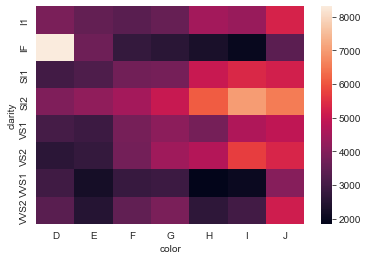

In [29]:
sns.heatmap(diamonds_pivot)

<AxesSubplot:xlabel='color', ylabel='clarity'>

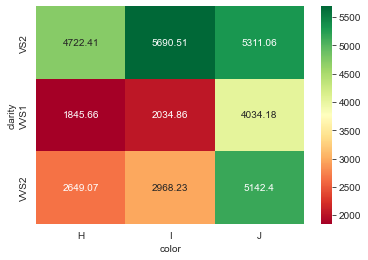

In [30]:
sns.heatmap(
    diamonds_pivot.iloc[5:, 4:],
    annot=True,
    fmt='g',
    cmap="RdYlGn"
)

<AxesSubplot:>

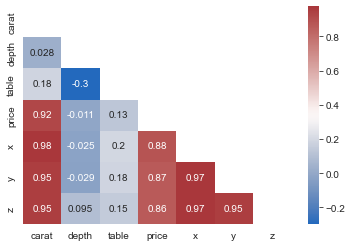

In [49]:
import numpy as np

sns.set_style("white")

diamonds_corr = diamonds.corr()

diamonds_corr

# Getting the Upper Triangle of the correlation matrix

matrix = np.triu(diamonds_corr)

sns.heatmap(
    diamonds_corr, 
    cmap="vlag", 
    annot=True,
    mask=matrix      
) 

## FacetGrid

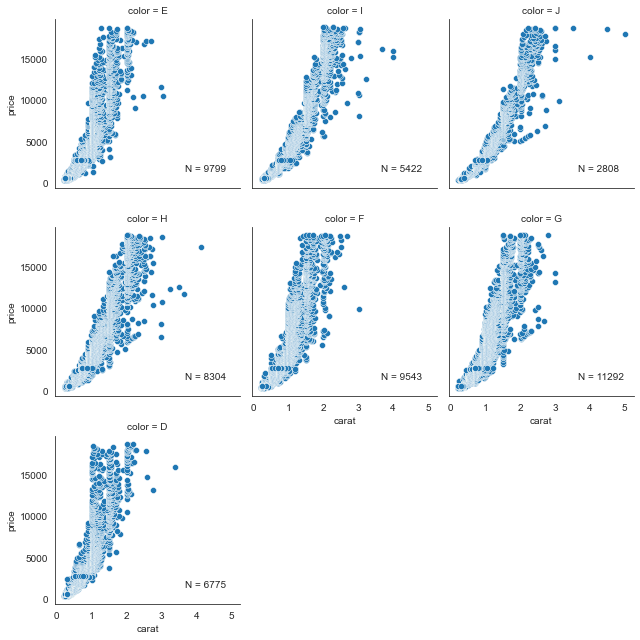

In [51]:
import matplotlib.pyplot as plt

def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.7, .1, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(diamonds, col="color", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="carat", y="price")
g.map_dataframe(annotate)

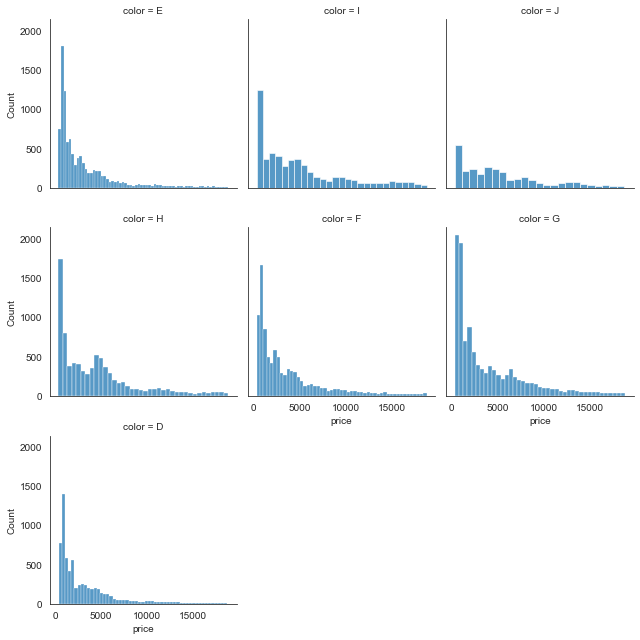

In [52]:
g = sns.FacetGrid(diamonds, col="color", col_wrap=3)

g.map_dataframe(sns.histplot, x="price")

## Matplotlib Integration

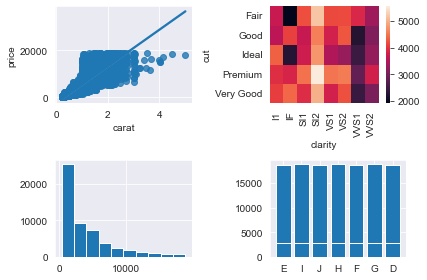

In [55]:
fig, ax = plt.subplots(2, 2)

sns.regplot(ax=ax[0][0], x="carat", y="price", data=diamonds)

sns.heatmap((diamonds
             .pivot_table(index="cut",
                      columns="clarity",
                      values={"price":"mean"}
                     )
             .droplevel(0, axis=1)
        ),
            ax = ax[0][1]
)

ax[1][0].hist(diamonds["price"])

ax[1][1].bar(x=diamonds["color"], height=diamonds["price"])

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Carat Weight')

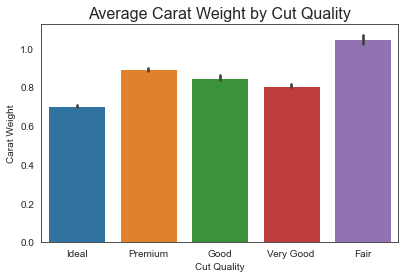

In [53]:
fig, ax = plt.subplots(figsize=(6.4, 4))

sns.set_style("darkgrid")

sns.barplot(x="cut",
            y="carat",
            data=diamonds)

ax.set_title("Average Carat Weight by Cut Quality", fontsize=16)
ax.set_xlabel("Cut Quality")
ax.set_ylabel("Carat Weight")

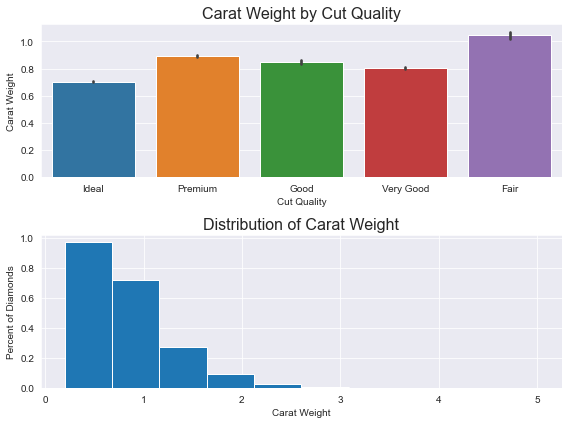

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

sns.set_style("darkgrid")

sns.barplot(
    x="cut",
    y="carat",
    data=diamonds,
    ax=ax[0]
)

ax[0].set_title("Carat Weight by Cut Quality", fontsize=16)
ax[0].set_ylabel("Carat Weight")
ax[0].set_xlabel("Cut Quality")

ax[1].hist(diamonds["carat"], density=True)
ax[1].set_title("Distribution of Carat Weight", fontsize=16)
ax[1].set_xlabel("Carat Weight")
ax[1].set_ylabel("Percent of Diamonds")

fig.tight_layout()